In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# S-100 AI-DAMS: Artificial Intelligence Dynamic Anchorage Management System

## Abstract
This notebook demonstrates the algorithmic logic behind **S-100 AI-DAMS**, a predictive module designed to sit atop Port Management Information Systems. Unlike traditional static charts, this system utilizes real-time data to create a "Living Anchorage."

## The Operational Challenge
[span_3](start_span)Traditional anchorage designations rely on static "safe zones" calculated for worst-case scenarios[span_3](end_span). [span_4](start_span)This rigidity leads to underutilization of deep-water space and increased vessel queuing, generating unnecessary emissions[span_4](end_span).

## The Solution
The code below simulates the **Risk Confidence Score** engine. It ingests simulated S-100 data streams:
* **S-102:** Bathymetric Surface (Depth)
* **S-104:** Water Level (Tides)
* **S-111:** Surface Currents


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. SIMULATING THE S-100 DATA STREAMS ---
# [span_6](start_span)As described in the abstract, the system needs 3 key inputs[span_6](end_span).

def get_live_conditions():
    """
    Simulates real-time environmental data feeds.
    """
    # S-104 (Water Level): Simulating a positive tide of 1.2 meters
    tide_level = 1.2 
    
    # S-111 (Surface Currents): Simulating a moderate current of 0.5 knots
    current_speed = 0.5 
    
    # S-102 (Bathymetry): Simulating a grid of seabed depths (15m to 25m)
    # Creating a 10x10 grid representing anchorage slots
    seabed_depths = np.random.uniform(15, 25, (10, 10))
    
    return tide_level, current_speed, seabed_depths

print("S-100 Data Streams Initialized.")


S-100 Data Streams Initialized.


In [3]:
# --- 2. THE AI-DAMS DECISION ENGINE ---
# [span_8](start_span)Calculates 'Risk Confidence Score' based on draft, tide, and seabed[span_8](end_span).

def calculate_risk_score(vessel_draft, ukc_limit, tide, currents, seabed_grid):
    """
    Inputs:
    - vessel_draft: The depth of the ship below water (in meters)
    - ukc_limit: Minimum Under Keel Clearance required (safety buffer)
    - tide: Real-time tide height (S-104)
    - seabed_grid: Static depth chart (S-102)
    """
    rows, cols = seabed_grid.shape
    risk_map = np.zeros((rows, cols))
    status_map = np.empty((rows, cols), dtype=object)

    for r in range(rows):
        for c in range(cols):
            static_depth = seabed_grid[r, c]
            
            # Dynamic Depth Calculation: Static Depth + Tide
            dynamic_depth = static_depth + tide
            
            # Actual Clearance
            clearance = dynamic_depth - vessel_draft
            
            # LOGIC: 
            # If clearance is high and currents are low, Risk Score is LOW (Good).
            # If clearance is near limit or currents high, Risk Score is HIGH (Bad).
            
            if clearance < ukc_limit:
                risk_score = 100 # Unsafe
                status = "Unsafe"
            else:
                # Simple algorithm to simulate DRL confidence score
                # Higher clearance = Lower risk
                base_risk = (1 / clearance) * 10 
                # Higher currents = Higher risk
                current_penalty = currents * 5
                
                risk_score = min(base_risk + current_penalty, 99)
                status = "Dynamic Safe Zone" if risk_score < 40 else "Monitor"

            risk_map[r, c] = risk_score
            status_map[r, c] = status
            
    return risk_map, status_map

print("Decision Engine Loaded.")


Decision Engine Loaded.


In [4]:
# --- 2. THE AI-DAMS DECISION ENGINE ---
# [span_8](start_span)Calculates 'Risk Confidence Score' based on draft, tide, and seabed[span_8](end_span).

def calculate_risk_score(vessel_draft, ukc_limit, tide, currents, seabed_grid):
    """
    Inputs:
    - vessel_draft: The depth of the ship below water (in meters)
    - ukc_limit: Minimum Under Keel Clearance required (safety buffer)
    - tide: Real-time tide height (S-104)
    - seabed_grid: Static depth chart (S-102)
    """
    rows, cols = seabed_grid.shape
    risk_map = np.zeros((rows, cols))
    status_map = np.empty((rows, cols), dtype=object)

    for r in range(rows):
        for c in range(cols):
            static_depth = seabed_grid[r, c]
            
            # Dynamic Depth Calculation: Static Depth + Tide
            dynamic_depth = static_depth + tide
            
            # Actual Clearance
            clearance = dynamic_depth - vessel_draft
            
            # LOGIC: 
            # If clearance is high and currents are low, Risk Score is LOW (Good).
            # If clearance is near limit or currents high, Risk Score is HIGH (Bad).
            
            if clearance < ukc_limit:
                risk_score = 100 # Unsafe
                status = "Unsafe"
            else:
                # Simple algorithm to simulate DRL confidence score
                # Higher clearance = Lower risk
                base_risk = (1 / clearance) * 10 
                # Higher currents = Higher risk
                current_penalty = currents * 5
                
                risk_score = min(base_risk + current_penalty, 99)
                status = "Dynamic Safe Zone" if risk_score < 40 else "Monitor"

            risk_map[r, c] = risk_score
            status_map[r, c] = status
            
    return risk_map, status_map

print("Decision Engine Loaded.")


Decision Engine Loaded.


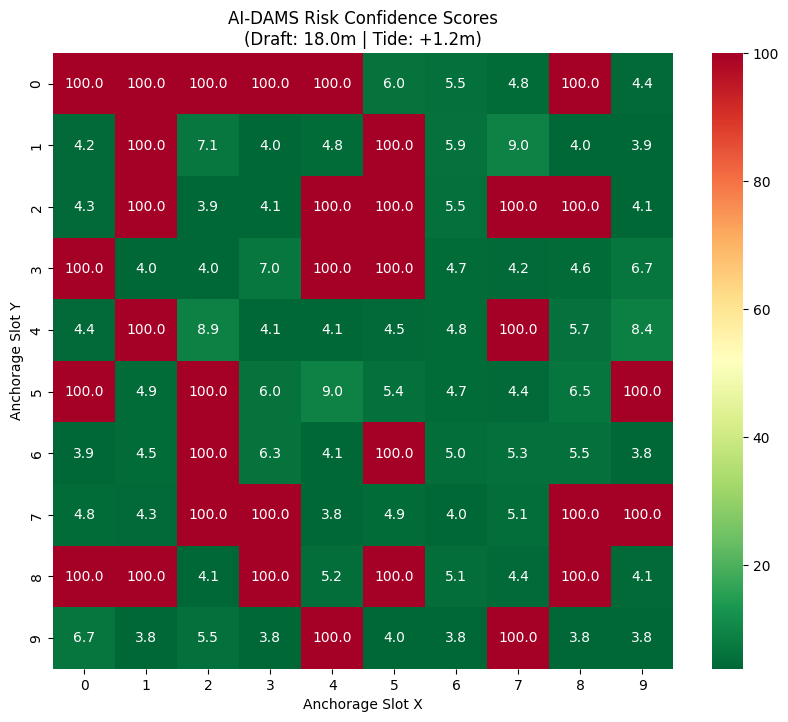

Green zones represent 'Dynamic Safe Zones' optimized by the system.


In [5]:
# --- 3. RUNNING THE SIMULATION ---

# [span_10](start_span)Scenario: An incoming Ultra-Large Vessel[span_10](end_span)
vessel_draft = 18.0 # meters
safety_ukc = 1.5    # meters

# 1. Get Environment
tide, current, seabed = get_live_conditions()

# 2. Run AI-DAMS Engine
risk_scores, statuses = calculate_risk_score(vessel_draft, safety_ukc, tide, current, seabed)

# 3. [span_11](start_span)Visualizing the "Living Anchorage"[span_11](end_span)
plt.figure(figsize=(10, 8))
sns.heatmap(risk_scores, annot=True, cmap="RdYlGn_r", fmt=".1f")
plt.title(f"AI-DAMS Risk Confidence Scores\n(Draft: {vessel_draft}m | Tide: +{tide}m)")
plt.xlabel("Anchorage Slot X")
plt.ylabel("Anchorage Slot Y")
plt.show()

print("Green zones represent 'Dynamic Safe Zones' optimized by the system.")


In [6]:
import plotly.graph_objects as go

# --- 4. FUTURISTIC 3D VISUALIZATION (Digital Twin) ---

# We use the 'seabed' data for the 3D shape and 'risk_scores' for the color.
# We invert the depth (multiply by -1) so deep water looks like a canyon.
z_data = -seabed 

# Create the 3D Surface
fig = go.Figure(data=[go.Surface(
    z=z_data, 
    surfacecolor=risk_scores, 
    colorscale='RdYlGn_r', # Green = Low Risk (Safe), Red = High Risk (Unsafe)
    cmin=0, cmax=100,
    colorbar=dict(title='Risk Score')
)])

# Styling to make it look like a Dashboard
fig.update_layout(
    title='<b>S-100 AI-DAMS: Real-time Digital Twin</b><br><i>Interactive Risk Topography</i>',
    scene = dict(
        xaxis_title='Longitudinal Slot',
        yaxis_title='Latitudinal Slot',
        zaxis_title='Depth (m)',
        aspectratio=dict(x=1, y=1, z=0.5), # Slightly flattens the Z axis for a better view
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.2)) # Sets the initial camera angle
    ),
    template="plotly_dark", # Dark mode for that "Futuristic Control Room" look
    margin=dict(l=0, r=0, b=0, t=50) # Tighter margins
)

fig.show()
